In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

INPUT_FILE = '../spotify-2023.csv'

In [2]:
# There are many encodings, check out https://docs.python.org/3/library/codecs.html#standard-encodings
# The usual ones I try are 'utf-8', 'windows-1252' and 'latin-1'
df = pd.read_csv(INPUT_FILE, encoding='windows-1252', sep='|')
df.describe()


,released_year,released_month,released_day,in_spotify_charts,bpm,danceability_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,923.000000
mean,2018.238195,6.033578,13.930745,12.009444,122.540399,68.886241
std,11.116218,3.566435,9.201949,19.575992,28.057802,18.215243
min,1930.000000,1.000000,1.000000,0.000000,65.000000,23.000000
25%,2020.000000,3.000000,6.000000,0.000000,100.000000,57.000000
50%,2022.000000,6.000000,13.000000,3.000000,121.000000,70.000000
75%,2022.000000,9.000000,22.000000,16.000000,140.000000,79.000000
max,2023.000000,12.000000,31.000000,147.000000,206.000000,148.000000


### Preprocessing - deal with NA/invalid values, dtypes etc.

In [3]:
# NOTE: you should manually check how much you are dropping and if it is acceptable
df = df.dropna()
df = df[(df['danceability_%'] >= 0) & (df['danceability_%'] <= 100)]
df['danceability_%'] = df['danceability_%'].astype(int)
df = df[df['streams'].str.isnumeric()]
df['streams'] = df['streams'].astype(int)
# remove quotes from track_name and artist(s)_name
df['track_name'] = df['track_name'].str.replace('"', '')
df['artist(s)_name'] = df['artist(s)_name'].str.replace('"', '')
display(df)
display(df.dtypes)
df.describe()


,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_charts,streams,bpm,key,danceability_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,7,14,147,141381703,125,B,80
1,LALA,Myke Towers,2023,3,23,48,133716286,92,C#,71
2,vampire,Olivia Rodrigo,2023,6,30,113,140003974,138,F,51
3,Cruel Summer,Taylor Swift,2019,8,23,100,800840817,170,A,55
4,WHERE SHE GOES,Bad Bunny,2023,5,18,50,303236322,144,A,65
...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,2022,11,3,0,91473363,144,A,60
949,Bigger Than The Whole Sky,Taylor Swift,2022,10,21,0,121871870,166,F#,42
950,A Veces (feat. Feid),"Feid, Paulo Londra",2022,11,3,0,73513683,92,C#,80
951,En La De Ella,"Feid, Sech, Jhayco",2022,10,20,0,133895612,97,C#,82


track_name           object
artist(s)_name       object
released_year         int64
released_month        int64
released_day          int64
in_spotify_charts     int64
streams               int64
bpm                   int64
key                  object
danceability_%        int64
dtype: object

,released_year,released_month,released_day,in_spotify_charts,streams,bpm,danceability_%
count,802.000000,802.000000,802.000000,802.000000,8.020000e+02,802.000000,802.000000
mean,2018.249377,6.031172,13.779302,12.194514,5.203897e+08,122.927681,67.271820
std,11.025231,3.543245,9.311635,19.534203,5.802546e+08,28.149898,14.683543
min,1930.000000,1.000000,1.000000,0.000000,2.762000e+03,67.000000,23.000000
25%,2020.000000,3.000000,5.000000,0.000000,1.383802e+08,100.000000,57.000000
50%,2022.000000,5.500000,13.000000,3.000000,2.876903e+08,121.000000,70.000000
75%,2022.000000,9.000000,22.000000,17.000000,6.768023e+08,141.750000,78.000000
max,2023.000000,12.000000,31.000000,147.000000,3.703895e+09,206.000000,100.000000


### Find the oldest and the newest song(s).

In [4]:
# release date from released_year, released_month, released_day use datetime
df["release_date"] = pd.to_datetime(df["released_year"].astype(str) + "-" + df["released_month"].astype(str) + "-" + df["released_day"].astype(str), format='%Y-%m-%d')
# oldest and newest songs (print whole row)
oldest = df[df['release_date'] == df['release_date'].min()]
newest = df[df['release_date'] == df['release_date'].max()]
print("Oldest")
display(oldest)
print("Newest")
display(newest)


Oldest


,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_charts,streams,bpm,key,danceability_%,release_date
439,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",1930,1,1,0,90598517,130,F#,65,1930-01-01


Newest


,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_charts,streams,bpm,key,danceability_%,release_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,7,14,147,141381703,125,B,80,2023-07-14
68,Overdrive,Post Malone,2023,7,14,36,14780425,140,C#,56,2023-07-14


### What song(s) has/have the largest number of artists?


In [5]:
df['artist_count'] = df['artist(s)_name'].str.split(',').str.len()
df[df['artist_count'] == df['artist_count'].max()]

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_charts,streams,bpm,key,danceability_%,release_date,artist_count
642,Se Le Ve,"Arcangel, De La Ghetto, Justin Quiles, Lenny T...",2021,8,12,0,223319934,84,G,56,2021-08-12,8


### Artist with the most songs

In [6]:
df["artist(s)_name"] = df["artist(s)_name"].str.split(",")
df["artist(s)_name"].explode().str.strip().value_counts().sort_values(ascending=False).head(1)

artist(s)_name
Bad Bunny    33
Name: count, dtype: int64

### Top 10 artists with the most songs in the top 100 on the Spotify charts
- Make an appropriate visualization
- Save the counts (for all!) artists to a csv (2 columns - artist and count of the songs in the top 100 on the Spotify charts)

artist(s)_name
Bad Bunny         26
Taylor Swift      19
Feid              15
The Weeknd        13
Rauw Alejandro    10
                  ..
Prezioso           1
Matuï¿½ï¿½         1
Wiu                1
                   1
Jin                1
Name: count, Length: 415, dtype: int64

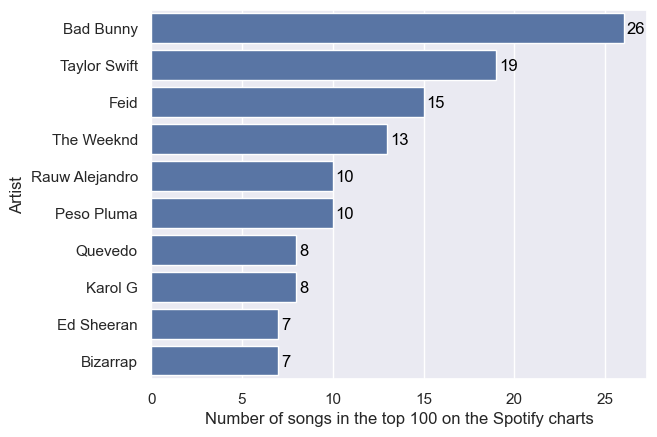

In [7]:
### Artist with the most songs in the top 100 on the Spotify charts
# so in_spotify_charts has to be >0 and <= 100
top_artists = df[(df['in_spotify_charts'] > 0) & (df['in_spotify_charts'] <= 100)]['artist(s)_name'].explode().str.strip().value_counts().sort_values(ascending=False)

display(top_artists)
top_artists.to_csv('top_artists.csv')

top_artists = top_artists.head(10)
fig, ax = plt.subplots()
sns.barplot(y=top_artists.index, x=top_artists.values, ax=ax, orient='h')
ax.set_xlabel('Number of songs in the top 100 on the Spotify charts')
ax.set_ylabel('Artist')
for i, v in enumerate(top_artists.values):
    ax.text(v + .15, i + .15, str(v), color='black')
plt.savefig('top_artists.pdf')

### Randomly pick 5 songs

In [8]:
df.sample(n=5, random_state=1) # random_state for reproducibility

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_charts,streams,bpm,key,danceability_%,release_date,artist_count
8,fukumean,[Gunna],2023,5,15,83,95217315,130,C#,85,2023-05-15,1
939,Spin Bout U,"[Drake, 21 Savage]",2022,11,4,2,198365537,130,G,77,2022-11-04,2
682,Malvada,[Zï¿½ï¿½ Fe],2022,1,28,0,154119539,135,F,89,2022-01-28,1
255,Curtains,[Ed Sheeran],2023,5,5,0,39893489,176,F#,50,2023-05-05,1
593,Rolling in the Deep,[Adele],2010,11,29,6,1472799873,105,G#,73,2010-11-29,1
